# Advanced Topics II: Complexity 

**Monday: Generators and Iterators**

In previous sections of this book, you may have seen the words generators or iterators
mentioned. Without knowing, you’ve been using them the entire time.

**Iterators vs. Iterables**

An **iterator** is an object that contains items which can be iterated upon, meaning
you can traverse through all values. An **iterable** is a collection like lists, dictionaries,
tuples, and sets. The major difference is that iterables are not iterators; rather they are
containers for data. In Python, iterator objects implement the magic methods iter and
next that allow you to traverse through its values.

In [1]:
# creating a basic iterator from an iterable
sports = [ "baseball", "soccer", "football", "hockey", "basketball" ]
my_iter = iter(sports)
print(next(my_iter)) # outputs firs item
print(next(my_iter)) # outputs second item
for item in my_iter: # this is ine 10
    print(item)
print(next(my_iter))

baseball
soccer
football
hockey
basketball


StopIteration: 

**Note :** Iterators will always remember the last item that they
returned, which is why we get an error on line 13. Using the next() method, we’re able
to output the next item within the iterator. Once all the items within the iterator have
been used, however, we can no longer traverse through the iterator, as there are no
more items left. Iterators are great for looping as well, and like lists and dictionaries,
we can simply use the in keyword (see line 10). You can still loop over the list like we
normally do, and it will always begin from index 0, but once our iterator is out of items,
we can no longer use it.

**Creating Our Own Iterator**

To create an iterator, we’ll need
to implement the magic methods __iter__() and __next__():

In [1]:
# creating our own iterator
class Alphabet():
    def __iter__(self):
        self.letters = "abcdefghijklmnopqrstuvwxyz"
        self.index = 0
        return self
    def __next__(self):
        if self.index <= 25:
            char = self.letters[self.index]
            self.index += 1
            return char
        else:
            raise StopIteration
for char in Alphabet():
    print(char)

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z


**Note :** Iterators are useful when you’re in need of traversing through Python collections
in a specific way.

**What Are Generators?**

Generators are functions that yield back information to produce a sequence of results rather than a single value. They’re a way to simplify the creation of an iterator. Normally, when a function has completed its task and returned information, the variables declared inside of the function will be deleted. With generators, however, they use the “yield” keyword to send information back to the location it was called without terminating the function. Generators don’t always have to yield back integers though you can yield any information you’d like.   
**Note :** Generators are simplified iterators.

**Creating a Range Generator**

lthough the range function is not a generator, we can make our own version that’s
created from a generator using the yield keyword.

In [3]:
# creating our own range generator with start, stop, and step parameters
def myRange(stop, start = 0, step = 1):
    while start < stop:
        print("Geerator Start Value: {}".format(start))
        yield start
        start += step # increment start, otherwise infinite loop
for x in myRange(5):
    print("For Loop X Value: {}".format(x))

Geerator Start Value: 0
For Loop X Value: 0
Geerator Start Value: 1
For Loop X Value: 1
Geerator Start Value: 2
For Loop X Value: 2
Geerator Start Value: 3
For Loop X Value: 3
Geerator Start Value: 4
For Loop X Value: 4


### MONDAY EXERCISES

In [16]:
liste = [ 1, 2, 3, 4, 5 ]
class RevIter():
    def __init__(self, liste):
        self.liste = liste
        self.index = -1
    def __iter__(self):
        return self
    def __next__(self):
        if self.index >= -len(liste):
            item = self.liste[self.index]
            self.index -= 1
            return item
        else:
            raise StopIteration

for item in RevIter(liste):
    print(item)

5
4
3
2
1


In [1]:
def squared(num):
    for i in range(num+1):
        yield i**2
for i in squared(4):
    print(i)

0
1
4
9
16


# Tuesday: Decorators

**What Are Decorators?**
**Decorators**, also known as wrappers, are functions that give other functions extra
capabilities without explicitly modifying them. They are denoted by the “@” symbol
in front of the function name, which is written above a function declaration like the
following:
<p><b>
>>> @decorator  <br>
>>> def normalFunc( ): <br>
    </b></p>

Decorators are useful when you want to perform some functionality before or
after a function executes. For example, let’s imagine you wanted to restrict access to
a function based on a user being logged in. Rather than writing the same conditional
statement for every function you create, you could put the code into a decorator
and apply the decorator onto all functions. Now, whenever a function is called, the
conditional statement will still run, but you were able to save yourself several lines.
This is a real-life example for the Flask framework, which restricts access to certain
pages based on user authentication using decorators. We’ll see a minimal example of
this later today.

**Higher-Order Functions**

A higher-order function is a function that operates on other functions, either by taking
a function as its argument or by returning a function. We saw this done in last week’s
lesson with lambdas, map, filter, and reduce. Decorators are higher-order functions
because they take in a function and return a function.

**Creating and Applying a Decorator**

We’ll need to declare a function that takes in another function as an argument in order
to create a decorator. Inside of this decorator, we can then define another function to be
returned that will run the function that was passed in as an argument. Let’s see how this
is written:

In [3]:
#creating and applying our own decorator using the @ symbol
def dectator(func):
    def wrap():
        print("=======")
        func()
        print("======")
    return wrap
@dectator
def printName():
    print("John!")
printName( )

John!


**Decorators with Parameters**:
Although decorators simply add extra capabilities to functions, they can also have
arguments like any other function. Let’s take the following example where we want to
run a function x times:

In [13]:
# creating a decorator that takes in parameters
def run_times(num):
    def wrap(func):
        for i in range(num):
            func()
    return wrap

@run_times(4)
def sayHello():
    print("Hello!")

Hello!
Hello!
Hello!
Hello!


**Note** When passing an argument into a decorator, the function is automatically
run, so we do not need to call sayHello in this instance.

**Functions with Decorators and Parameters**

When you need a function to accept arguments, while also having a decorator attached
to it, the wrap function must take in the same exact arguments as the original function.
Let’s try it:

In [14]:
#creating a dectator for a function that accepts parameters
def birthday(func):
    def wrap(name, age):
        func(name, age + 1)
    return wrap
#birthday
def celebrate(name, age):
    print( f"Happy birthday {name}, you are now {age }.")
celebrate("Paul", 43)

Happy birthday Paul, you are now 43.


**Restricting Function Access**
You’re probably wondering how decorators can serve a purpose, since the last few cells
seem meaningless. For each one of them, we could have simply added those lines within
the original function. That was just for syntax understanding though. Decorators are
used a lot with frameworks and help to add functionality to many functions that you’ll
write within them. One example is being able to restrict access of a page or function
based on user login credentials. Let’s create a decorator that will help to restrict access if
the password doesn’t match

In [28]:
# real world sim, restricting function access
def login_required(func):
    def wrap(user):
        password = input("What is the password?")
        if password == user["password"]:
            func(user)
        else:
            print("Access Denied")
    return wrap
@login_required
def restrictedFunc(user):
    print("Access granted, welcome {}".format(user["name"]))
user = { "name" : "Jess", "password" : "ilywpf" }
restrictedFunc(user)

What is the password?ilywpf
Access granted, welcome Jess


# TUESDAY EXERCISES

**1. User Input:** Create a decorator that will ask the user for a number, and run
the function it is attached to only if the number is less than 100. The function
should simply output “Less than 100”. Use the function declaration in the
following:


<p>
>>> @decorator <br>
>>> def numbers(): <br>
>>>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;print("Less than 100")
</p>

In [40]:
def decorator(func):
    def number():
        num = int(input("Please enter a number: "))
        if num < 100:
            func()
        else:
            print("Great !")
    return number

@decorator
def numbers():
    print("Less than 100")
numbers()

Please enter a number: 165
Great !


**Creating a Route:** Create a decorator that takes in a string as an argument with
a wrap function that takes in func. Have the wrap function print out the string,
and run the function passed in. The function passed in doesn’t need to do
anything. In Flask, you can create a page by using decorators that accept a URL
string. Use the function declaration in the following to start:
<p>>>> @route("/index") <br>
>>> def index( ): <br>
>>> print("This is how web pages are made in Flask") <br>
</p>

In [42]:
def route(*a):
    def wrap(func):
        print(*a)
        func()
    return wrap
        
@route("/index")
def index():
    print("This is how web pages are made in Flask")

/index
This is how web pages are made in Flask


**Today was an important lesson in preparation for other technologies that use
Python, such as frameworks. Decorators help to improve function execution and
can be attached to any function necessary. This helps to reduce code and give
improved functionality.**

# Wednesday: Modules

**Importing a Module**

For the next few examples, we’ll be working with the math module, which is one of
Python’s built-in modules. This specific module has functions and variables to help us
with any problem related to math, whether it’s rounding, calculating pi, or many other
math-related tasks. For this first cell, we’re going to import the entire math module and
its contents

In [44]:
# import the entire math module
import math 
print(math.floor(2.5)) # rounds down
print(math.ceil(2.5))  # rounds up
print(math.pi)

2
3
3.141592653589793


**Importing Only Variables and Functions**

In [48]:
# importing only variables and functions rather than an entire module, better efficiency

from math import floor, pi
print(floor(2.5))
#print(ceil(2.5))         #will cause error because we only imported floor and pi, not ceil and not all of math
print(pi)

2
3.141592653589793


**Note** You can import classes from modules the same way as earlier; simply use
the name of the class.

**Using an Alias**

In [49]:
# using the 'as' keyword to create an alias for imports
from math import floor as f
print( f(2.5) )

2


**Creating Our Own Module**

Now that we know how to import and call a module, let’s create our own. Go ahead
and open any text editor you have on your computer like Notepad or TextEdit. Write the
following code in cell in the file, and save it within the same folder that your “Week_09” file is
located, with the name “test.py”. If the two files aren’t in the same directory, it produces
an error: 


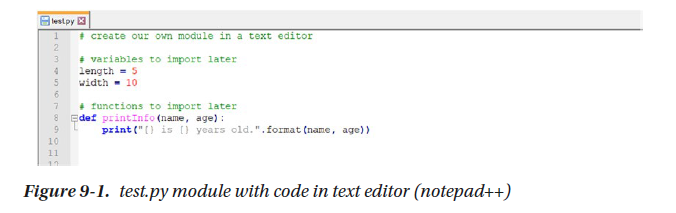

In [50]:
from IPython.display import Image
Image(filename='images_projects/test.png')

**Using Our Module in Jupyter Notebook**

In any other circumstance, you’d import the variables and function we wrote in test.py
with the import and from keywords. Jupyter Notebook, however, works a little differently
when using modules that you’ve created. We’ll use the “run” command in order to load
in the entire module that we’ve created. After we run the file, we can use the variables
and functions that we wrote within the module. Let’s check out how to do so:

In [52]:
# using the run command with Jupyter Notebook to access our own modules
%run test.py
print(length, width)
printInfo("John Smith", 37) # able to call from the module because we ran the file in Jupyter above


5 10
John Smith is 37 years old.


**WEDNESDAY EXERCISES**
1. Time Module: Import the time module and call the sleep function. Make the
cell sleep for 5 seconds, and then print “Time module imported”. Although
we haven’t covered this module, this exercise will provide good practice
for you to try and work with a module on your own. Feel free to use Google,
Quora, etc.

In [59]:
import time 
word = 5
time.sleep(word)
print("Time module imported")

Time module imported


**2. Calculating Area:**

Create a module named “calculation.py” that has a single
function within it. That function should take in two parameters and return the
product of them. We can imagine that we’re trying to calculate the area of
a rectangle and it needs to take in the length and width properties. Run the
module within Jupyter Notebook, and use the following function call within
the cell

In [63]:
%run calculation.py

calcArea(15, 30)

450